# Part II - (Ford GoBike Presentation)
## by (Adeyemi O. Samson)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. My Capstone project of Udemy Nanodegree Data Analysis Course

> In first Part, Exploratory data visualization, l use Python visualization libraries to systematically explore a 201902-fordgobike-tripdata dataset, starting from plots of single variables and building up to plots of multiple variables.

> In second Part, Explanatory data visualization, I  produce a short presentation that illustrates interesting properties, trends, and relationships that i discovered in 201902-fordgobike-tripdata dataset.

> The presentation focuses on the relationship between the trip duration in minutes and the user types 

> I start with a bar chart of the distribution of bike trip duration in minute.  Follow by the distribution of trip by the start day of the week.

> In conclusion I presented a pivot table of the weekly hourly usage of bike for customer and subscribers 

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

> This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. My Capstone project of Udemy Nanodegree Data Analysis Course 

> In first Part, Exploratory data visualization, l use Python visualization libraries to systematically explore a 201902-fordgobike-tripdata dataset, starting from plots of single variables and building up to plots of multiple variables.

> In second Part, Explanatory data visualization, I  produce a short presentation that illustrates interesting properties, trends, and relationships that i discovered in 201902-fordgobike-tripdata dataset.

>This data set consist of information of about 183412 individual rides of Ford GoBike data system. Its has sixteen special feature which include the duration in seconds, start time, end time, start station name, start station latitude and longitude, start and end station id, end station longitude and latitude, bike id, user type, member birth year and gender and bike share for all trip. This data is provided by Udemy for exploration and visualization analysis. The data set has no duplicate value and its within the range of a month.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> Duration has a long tailed distribution with significant number of rides taking longer than 200 minutes. When plotted on a log-scale, the duration distribution looks roughly bell-shaped, with one peak between 9 and 10. Most of the bike trips lasts between 9 and 16 minutes. There are not a lot of bike trips that lasted less than 2 minutes and over 50 minutes.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

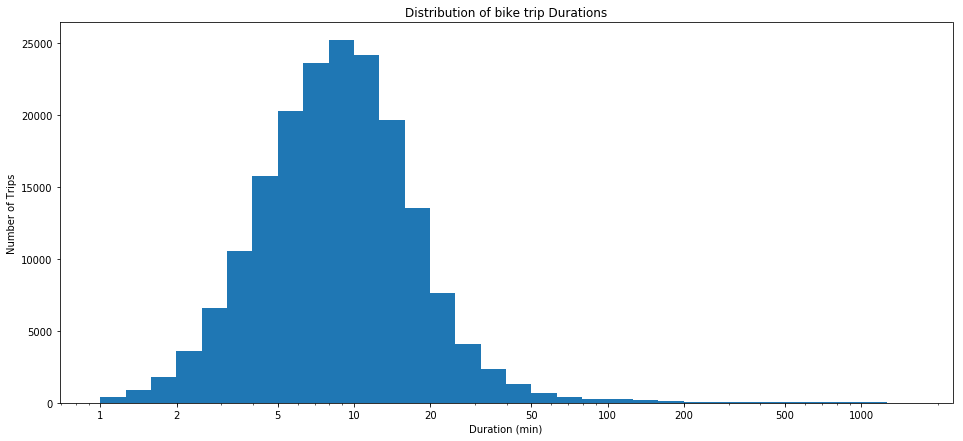

In [3]:
# Chnaging the star time and end time to datetime datatype
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df = df.sort_values(by='start_time')
# Extracting mins, days, weeks and months from the start time column
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%b')
df['year_month'] = df['start_time'].dt.to_period('M')

# Creating duration in minute column from duration in second column
df['duration_min'] = df['duration_sec']/60
# Plot of Distribution of Bike trip Duration
log_binsize = 0.1
bins_log = 10 ** np.arange(0.0, np.log10(df['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[16, 7])
plt.hist(data = df, x = 'duration_min', bins = bins_log)
plt.title('Distribution of bike trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

## (Visualization 2)

> Their is a significant higher trip duration by Customer during week days. Most of these trips happens during weekends when most people are not at work

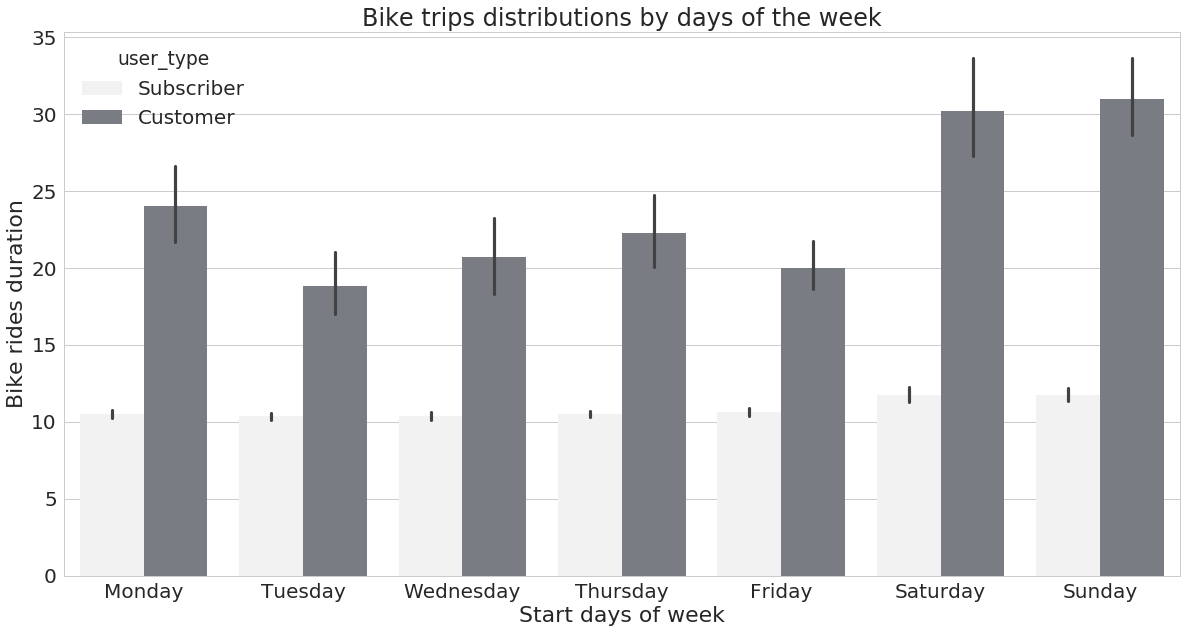

In [4]:

# Plot of relationship between start days of the week, duration and user type
sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(categories=weekday, ordered=True)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

sb.set_style("whitegrid")
sb.barplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type', saturation = 0.1, color= sb.color_palette()[0])
plt.xlabel('Start days of week')
plt.ylabel('Bike rides duration')
plt.title("Bike trips distributions by days of the week");

## (Visualization 3)

> The number of subscriber that hire bike during week days is more than triple that of the customer

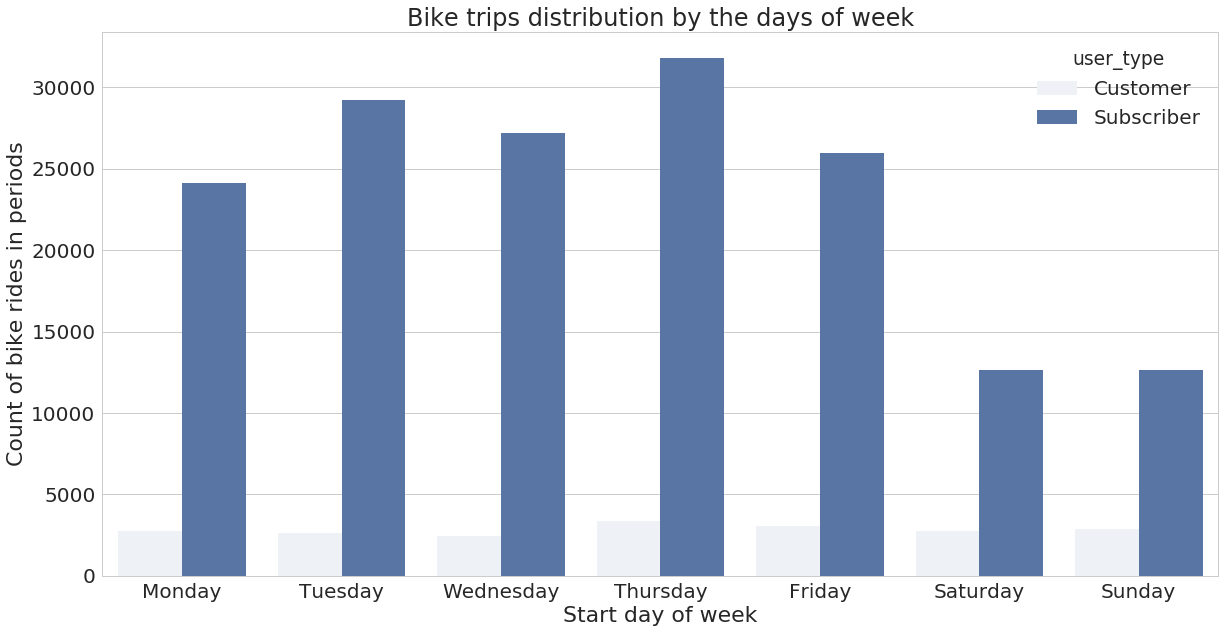

In [7]:
# changing the user type datatype to catigorical
df['user_type'] = df['user_type'].astype('category')
# A plot of Distribution of bike trip by start day of week base on the user type

sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=df, x='start_day_of_week', hue='user_type',color=sb.color_palette()[0])
plt.xlabel('Start day of week')
plt.ylabel('Count of bike rides in periods')
plt.title("Bike trips distribution by the days of week");

## (Visualization 4)

>  its indicates and strenthen the result of the of our bivariate exploration that shows different usage patterns. Customers and Subscriber do have their peak almost during thesame our of the day. But customer tend to use the bike service mostly towards the weekends(Thursday - Sunday)

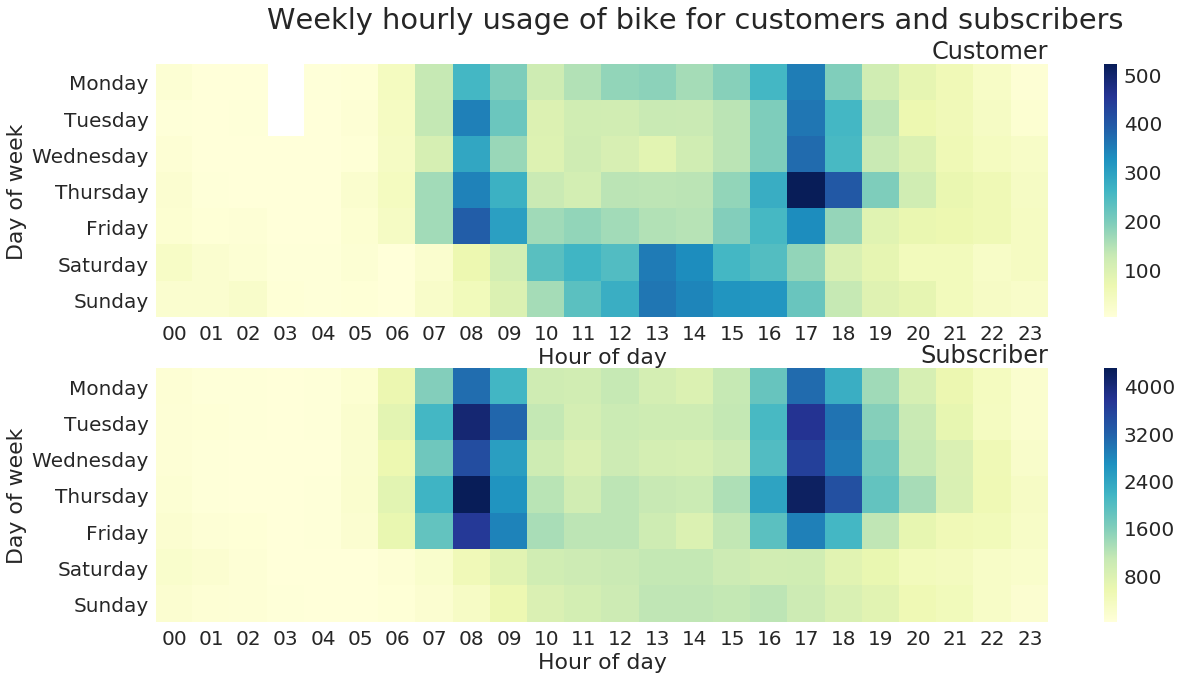

In [8]:
# A plot of relationship between customer, start day of week, start hour of week and Subscriber 
sb.set(rc={'figure.figsize':(20,10)}, font_scale=2)
plt.rcParams['axes.grid'] = True
sb.set_style("whitegrid")

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
cust_week_hour = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size().reset_index(name='count')
cust_week_hour = cust_week_hour.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(cust_week_hour, cmap="YlGnBu");
plt.title('Customer', loc='right');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
sub_week_hour = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size().reset_index(name='count')
sub_week_hour = sub_week_hour.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(sub_week_hour, cmap="YlGnBu");
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplots_adjust(top=0.9)
plt.suptitle('Weekly hourly usage of bike for customers and subscribers');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_ford_gobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_ford_gobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 566297 bytes to Part_II_ford_gobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_ford_gobike_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: 

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 